In [ ]:
1+1

2

#Lecture 1.2 - Implementation of Python codes (Part 1)
-------------------------------------

# PDSA with Python, Week 1 - Introducing Jupyter Notebook
## Computing primes from 1 to 100

## Aim of this notebook
* Illustrate how Jupyter/Colab notebooks work
* Interspersing documentation, explanations with the code
* Output is preserved, reloaded when the notebook is opened the next time





## Let's begin

First: a function compute list of factors of a number

In [ ]:

def factors(n):
  factorlist = []
  for i in range(1,n+1):
    if n%i == 0:
      factorlist.append(i)
  return(factorlist)
  factors(10)

Next: two different definitions for checking if a number is a prime
1. Note that different definitions can coexist in the notebook
1. When we *run* a cell, that definition becomes the current one
1. The first definition is *intentionally* wrong (the condition in the `return()` should be `==` rather than `!=`)

In [ ]:
def prime(n):
  return(factors(n) != [1,n])

In [ ]:
def prime(n):
  return(len(factors(n)) == 2)

Finally, some code that uses the functions defined above to list primes from 1 to 100
* Try it with each of the definitions of `prime()` above
    * Using the second version (the **correct** characterization) you should get the primes from 2 to 97
    * Using the first version (the intentionally **incorrect** version) you should get the composite numbers from 1 to 100

In [ ]:
primelist = []
for i in range(1,101):
  if (prime(i)):
    primelist.append(i)

print(primelist)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


## Graphical output
This is to show more interesting forms of output are preserved by the notebook
* Plot $1 + \cos(x)$ for $x \in [0,4\pi)$
    * More precisely, $1 + \cos(2\pi t)$ for $t \in [0,2)$, in discrete increments of $0.01$
* Change $\cos()$ to $\sin()$ and see how the output changes
* **Note**: Markdown supports $\LaTeX$ for math!

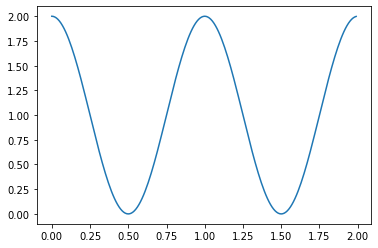

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array t = [0, 0.01, 0.02, ..., 1.99]
t = np.arange(0.0, 2.0, 0.01)

# print(t) will show you the array t

# Compute an array s containing f(t) for each value of t
s = 1 + np.cos(2 * np.pi * t)

# print(s) will show you the array s

# Create the plot of t vs s and display it
fig, ax = plt.subplots()
ax.plot(t, s)

plt.show()

------------------------------------------------------------------------
------------------------------------------------------------------------

#Lecture 1.8 - Implementation of Python codes (Part 2)
--------------------------------------------------------

# PDSA with Python, Week 1 - Classes and objects

### Basic definition of class `Point` using $(x,y)$ coordinates

In [ ]:
class Point:
  def __init__(self,a=0,b=0):
    self.x = a
    self.y = b

  def translate(self,deltax,deltay):
    self.x += deltax
    self.y += deltay

  def odistance(self):
    import math
    d = math.sqrt(self.x*self.x +
                  self.y*self.y)
    return(d)

Create two points

In [ ]:
p = Point(3,4)
q = Point(7,10)

Compute `odistance` for `p` and `q`

In [ ]:
p.odistance(), q.odistance()

(5.0, 12.206555615733702)

Translate `p` and check the distance

In [ ]:
p.translate(3,4)
p.odistance()

10.0

* At this stage, `print()` does not produce anything meaningful
* `+` is not defined yet

In [ ]:
print(p)

In [ ]:
print(p+q)

TypeError: ignored

## Now change the definition of `Point` to use $(r,\theta)$ representation

In [ ]:
import math
class Point:
  def __init__(self,a=0,b=0):
    self.r = math.sqrt(a*a + b*b)
    if a == 0:
      self.theta = 0
    else:
      self.theta = math.atan(b/a)

  def translate(self,deltax,deltay):    
    x = self.r*math.cos(self.theta)
    y = self.r*math.sin(self.theta)
    x += deltax
    y += deltay
    self.r = math.sqrt(x*x + y*y)
    if x == 0:
      self.theta = 0
    else:
      self.theta = math.atan(y/x)

  def odistance(self):
    return(self.r)


### Repeat the examples above
* Observe that nothing changes for the user of the class

Create two points

In [ ]:
p = Point(3,4)
q = Point(7,10)

Compute `odistance` for `p` and `q`

In [ ]:
p.odistance(), q.odistance()

(5.0, 12.206555615733702)

Translate `p` and check the distance

In [ ]:
p.translate(3,4)
p.odistance()

10.0

In [ ]:
print(p)

In [ ]:
print(p+q)

TypeError: ignored

## Return to $(x,y)$ representation, adding `__str__` and `__add__`

In [ ]:
class Point:
  def __init__(self,a=0,b=0):
    self.x = a
    self.y = b

  def translate(self,deltax,deltay):
    self.x += deltax
    self.y += deltay

  def odistance(self):
    import math
    d = math.sqrt(self.x*self.x +
                  self.y*self.y)
    return(d)

  def __str__(self):
    return('('+str(self.x)+','
            +str(self.y)+')')

  def __add__(self,p):
    return(Point(self.x + p.x, 
                 self.y + p.y))


## Again, run the same examples

In [ ]:
p = Point(3,4)
q = Point(7,10)

Compute `odistance` for `p` and `q`

In [ ]:
p.odistance(), q.odistance()

(5.0, 12.206555615733702)

Translate `p` and check the distance

In [ ]:
p.translate(3,4)
p.odistance()

10.0

In the following two cells, we see a difference
* Since `__str__` is defined, `print()` gives useful output
* `+` works as expected thanks to the definition for `__add__`

In [ ]:
print(p)

(6,8)


In [ ]:
print(p+q)

(13,18)


------------------------------------------------------------------------
------------------------------------------------------------------------

#Lecture 1.10 - Implementation of Python codes (Part 3)
--------------------------------------------------------

# PDSA with Python, Week 1 - Timing Code

### Define a `Timer` class

In [ ]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None
        self._elapsed_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError("Timer is running. Use .stop()")
        self._start_time = time.perf_counter()

    def stop(self):
        """Save the elapsed time and re-initialize timer"""
        if self._start_time is None:
           raise TimerError("Timer is not running. Use .start()")
        self._elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None

    def elapsed(self):
        """Report elapsed time"""
        if self._elapsed_time is None:
           raise TimerError("Timer has not been run yet. Use .start()")
        return(self_elapsed_time)

    def __str__(self):
        """print() prints elapsed time"""
        return(str(self._elapsed_time))

### Experimentally check Python execution time
* Run a simple loop $10^4, 10^5, \ldots, 10^8$ times
* Time taken ranges from approximately $0.001s$ to approximately $10s$

In [ ]:
t = Timer()
for j in range(4,9):
  t.start()  # Start the timer

  # Run a trivial loop with 10^j iterations
  n = 0
  for i in range(10**j):
    n = n+i
  
  t.stop()   # Stop the timer
  print(j,t) # Report time taken for this value of j

4 0.0016220360000005485
5 0.013152008000005821
6 0.12692025299999443
7 1.3113010569999943
8 12.951606929000008


### If we change the basic operation inside the loop to a constant assignment, the time is slightly less

In [ ]:
t = Timer()
for j in range(4,9):
  t.start()  # Start the timer

  # Run a trivial loop with 10^j iterations
  n = 0
  for i in range(10**j):
    n = 0
  
  t.stop()   # Stop the timer
  print(j,t) # Report time taken for this value of j

4 0.0015917349999767794
5 0.0088671290000093
6 0.07052080700000829
7 0.7320572719999916
8 7.1662828649999994


------------------------------------------------------------------------
------------------------------------------------------------------------

#Lecture 1.12 - Implementation of Python codes (Part 4)
--------------------------------------------------------

# PDSA with Python, Week 1 - Python Recap: gcd and primality

# **gcd**



## Compute gcd via list of common factors




In [ ]:
def gcd(m,n):
  cf = []   # List of common factors
  for i in range(1,min(m,n)+1):
    if (m%i) == 0 and (n%i) == 0:
      cf.append(i)
  return(cf[-1])


## Compute gcd using most recent common factor

In [ ]:
def gcd(m,n):
  for i in range(1,min(m,n)+1):
    if (m%i) == 0 and (n%i) == 0:
      mrcf = i
  return(mrcf)

### Let's use the `Timer` class to evaluate naive gcd

In [ ]:
import time

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None
        self._elapsed_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError("Timer is running. Use .stop()")
        self._start_time = time.perf_counter()

    def stop(self):
        """Save the elapsed time and re-initialize timer"""
        if self._start_time is None:
           raise TimerError("Timer is not running. Use .start()")
        self._elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None

    def elapsed(self):
        """Report elapsed time"""
        if self._elapsed_time is None:
           raise TimerError("Timer has not been run yet. Use .start()")
        return(self_elapsed_time)

    def __str__(self):
        """print() prints elapsed time"""
        return(str(self._elapsed_time))

## Experiment with inputs of size $10^6$ to $10^8$

In [ ]:
t = Timer()
# 10^6
t.start()
print(6712345,7654321,gcd(6712345,7654321))
t.stop()
print(t)
# 10^7
t.start()
print(67812345,87654321,gcd(67812345,87654321))
t.stop()
print(t)
# 10^8
t.start()
print(678912345,987654321,gcd(678912345,987654321))
t.stop()
print(t)

6712345 7654321 1
0.608340369000075
67812345 87654321 9
6.068647063000071
678912345 987654321 9
60.15791690699996


## Recursive gcd using m-n

In [ ]:
def gcd(m,n):
  (a,b) = (max(m,n), min(m,n))
  if a%b == 0:
    return(b)
  else:
    return(gcd(b,a-b))

## Re-run experiment with inputs of size $10^6$ to $10^8$

In [ ]:
t = Timer()
# 10^6
t.start()
print(6712345,7654321,gcd(6712345,7654321))
t.stop()
print(t)
# 10^7
t.start()
print(67812345,87654321,gcd(67812345,87654321))
t.stop()
print(t)
# 10^8
t.start()
print(678912345,987654321,gcd(678912345,987654321))
t.stop()
print(t)

NameError: ignored

## But all is not well.  Python has a small recursion depth (default is 999)

In [ ]:
gcd(2,999)

1

In [ ]:
gcd(2,9999)

RecursionError: ignored

## Can manually set recursion depth to a larger value

In [ ]:
import sys
sys.setrecursionlimit(10000)
gcd(2,9999)

1

## Increasing recursion limit by another factor of 10 causes Colab to crash

In [ ]:
import sys
sys.setrecursionlimit(100000)
gcd(2,99999)

## Euclid's algorithm

In [ ]:
def gcd(m,n):
  (a,b) = (max(m,n), min(m,n))
  if a%b == 0:
    return(b)
  else:
    return(gcd(b,a%b))

## Re-run experiment with inputs of size $10^6$ to $10^8$

In [ ]:
t = Timer()
# 10^6
t.start()
print(6712345,7654321,gcd(6712345,7654321))
t.stop()
print(t)
# 10^7
t.start()
print(67812345,87654321,gcd(67812345,87654321))
t.stop()
print(t)
# 10^8
t.start()
print(678912345,987654321,gcd(678912345,987654321))
t.stop()
print(t)

6712345 7654321 1
0.0034868870000082097
67812345 87654321 9
0.0013390710000749095
678912345 987654321 9
0.0009876770000118995


## Can go much further with Euclid's algorithm --- even $10^{16}$ takes only 0.001s


In [ ]:
# 10^16
t.start()
print(678912345678912345,987654321987654321,gcd(678912345678912345,987654321987654321))
t.stop()
print(t)

678912345678912345 987654321987654321 9000000009
0.0016202869999233371


# **Primality**

In [ ]:
def factors(n):
  fl = []   # factor list
  for i in range(1,n+1):
    if (n%i) == 0:
      fl.append(i)
  return(fl)

def prime(n):
  return(factors(n) == [1,n])

In [ ]:
for i in range(100):
  if prime(i):
    print(i,end=", ")
print()

2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 


In [ ]:
def primesupto(m):
  pl = []   # prime list
  for i in range(1,m+1):
    if prime(i):
      pl.append(i)
  return(pl)

In [ ]:
print(primesupto(1000))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


In [ ]:
def firstprimes(m):
  (count,i,pl) = (0,1,[])
  while (count < m):
    if prime(i):
      (count,pl) = (count+1,pl+[i])
    i = i+1
  return(pl)

In [ ]:
print(firstprimes(100))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541]


## Directly check if n has a non-trivial factor

In [ ]:
def prime(n):
  result = True
  for i in range(2,n):
    if (n%i) == 0:
      result = False
  return(result)

In [ ]:
for i in range(100):
  if prime(i):
    print(i,end=", ")
print()

0, 1, 2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 


## Note that this incorrectly lists 0 and 1 as prime!

## Compute frequencies of differences between consecutive primes

In [ ]:
def primediffs(n):
  lastprime = 2
  pd = {}  # Dictionary for 
           # prime diferences
  for i in range(3,n+1):
    if prime(i):
      d = i - lastprime
      lastprime = i
      if d in pd.keys():
        pd[d] = pd[d] + 1
      else:
        pd[d] = 1
  return(pd)

In [ ]:
pd10000 = primediffs(10000)
print(pd10000)

{1: 1, 2: 205, 4: 202, 6: 299, 8: 101, 14: 54, 10: 119, 12: 105, 18: 40, 20: 15, 22: 16, 34: 2, 24: 15, 16: 33, 26: 3, 28: 5, 30: 11, 32: 1, 36: 1}


## $3 - 2 = 1$. Other than this, all differences are even. Why?